In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## SEIR Equations
Reference: https://www.freecodecamp.org/news/how-to-model-an-epidemic-with-r/ 

In [2]:
# define the SEIR function
def SEIR_model(time, current_state, beta, sigma, gamma):
    S, E, I, R = current_state
        
    N = S + E + I + R
    dS = -(beta * S * I) / N
    dE = (beta * S * I) / N - sigma * E
    dI = sigma * E - gamma * I
    dR = gamma * I
    
    return [dS, dE, dI, dR]

## Initial Parameters
beta = 0.5 : Transmission/Contact rate  
sigma = 0.25 : Infectious rate  
gamma = 0.2 : Recovery rate  

days = 365 : Number of days to simulate

In [3]:
# initialise parameters
params = {
    'beta': 0.5,
    'sigma': 0.25,
    'gamma': 0.2
}

times = np.arange(0, 366)

## S - Susceptible, E - Exposed, I - Infectious, R - Recovered
S = 999999: The initial number of susceptible individuals is set to 999,999.  
E = 1: The initial number of exposed individuals is set to 1.  
I = 0: The initial number of infectious individuals is set to 0.  
R = 0: The initial number of recovered individuals is set to 0.  

In [4]:
# initialise the initialise state of SEIR
initial_state = [999999, 1, 0, 0]

## solve_ivp
To solve equation with respect to time

In [5]:
from scipy.integrate import solve_ivp

In [6]:
# Solve the SEIR model using solve_ivp
solution = solve_ivp(lambda t, y: SEIR_model(t, y, **params), [times[0], times[-1]], initial_state, t_eval=times)

## Summary of model's statistics

In [7]:
# Access the solution arrays
S = solution.y[0]
E = solution.y[1]
I = solution.y[2]
R = solution.y[3]

# Calculate summary statistics
summary_S = np.mean(S), np.min(S), np.max(S), np.percentile(S, [25, 50, 75])
summary_E = np.mean(E), np.min(E), np.max(E), np.percentile(E, [25, 50, 75])
summary_I = np.mean(I), np.min(I), np.max(I), np.percentile(I, [25, 50, 75])
summary_R = np.mean(R), np.min(R), np.max(R), np.percentile(R, [25, 50, 75])

list_summary = [summary_S, summary_E, summary_I, summary_R]
summary_names = ['S', 'E', 'I', 'R']

for i in range(len(list_summary)):
    print("Summary of", summary_names[i], ":")
    print("Mean:", list_summary[i][0])
    print("Minimum:", list_summary[i][1])
    print("Maximum:", list_summary[i][2])
    print("25th Percentile:", list_summary[i][3][0])
    print("50th Percentile (Median):", list_summary[i][3][1])
    print("75th Percentile:", list_summary[i][3][2])
    print()


Summary of S :
Mean: 361211.86036770145
Minimum: 107351.99388389131
Maximum: 999999.0
25th Percentile: 107352.00144070151
50th Percentile (Median): 107476.88694576031
75th Percentile: 846752.0731023097

Summary of E :
Mean: 9754.945934199244
Minimum: 4.312791617896341e-07
Maximum: 109689.09567478919
25th Percentile: 0.0056071516037324645
50th Percentile (Median): 8.230432459756965
75th Percentile: 1701.8511626319923

Summary of I :
Mean: 12195.176657245633
Minimum: 0.0
Maximum: 127748.68692057609
25th Percentile: 0.013479029324609395
50th Percentile (Median): 12.576834568421683
75th Percentile: 2582.7453622226194

Summary of R :
Mean: 616838.0170408537
Minimum: 0.0
Maximum: 892648.0061149226
25th Percentile: 66552.36916044446
50th Percentile (Median): 892182.9125833818
75th Percentile: 892647.9779577932



## Infection peak when there is no intervention taken

In [8]:
# Create a dataframe from the solution arrays
df_model = pd.DataFrame({
    'Time': times,
    'Susceptible': solution.y[0],
    'Exposed': solution.y[1],
    'Infectious': solution.y[2],
    'Recovered': solution.y[3]
})

# Extract the Infectious column
df_infections = df_model['Infectious']

# Obtain the max number of people infected
peak_infections = df_infections.max()

# Obtain the n-day when the number of people infected is max
peak_time = df_infections.idxmax()

print("The number of infections peaked on day", peak_time, "with", round(peak_infections), "people.")

# Extract the Exposed column
df_exposed = df_model['Exposed']

# Obtain the max number of people exposed
peak_exposed = df_exposed.max()

# Obtain the n-day when the number of people exposed is max
peak_time_exposed = df_exposed.idxmax()

print("The number of exposed peaked on day", peak_time_exposed, "with", round(peak_exposed), "people.")

The number of infections peaked on day 111 with 127749 people.
The number of exposed peaked on day 107 with 109689 people.


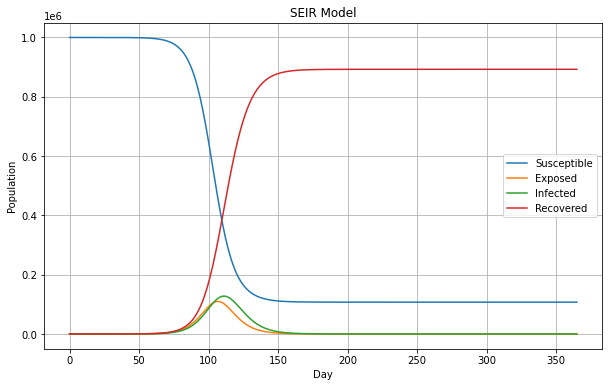

In [9]:
# Plotting the SEIR model
plt.figure(figsize=(10, 6))
plt.plot(times, S, label='Susceptible')
plt.plot(times, E, label='Exposed')
plt.plot(times, I, label='Infected')
plt.plot(times, R, label='Recovered')
plt.xlabel('Day')
plt.ylabel('Population')
plt.title('SEIR Model')
plt.legend()
plt.grid(True)

# # Adding horizontal and vertical lines to the peak infectious point
# point_x = peak_time  
# point_y = peak_infections

# # Horizontal line
# plt.axhline(y=point_y, color='black', linestyle='--')  
# # Vertical line
# plt.axvline(x=point_x, color='black', linestyle='--')  

# # Marking the point
# plt.scatter(point_x, point_y, color='black', marker='o')  

# # Adding text annotation for the point coordinates
# plt.text(point_x + 5, point_y + 30000, f'({point_x}, {round(point_y)})', color='black')

plt.show()